In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [26]:
# Wczytywanie danych
data = pd.read_csv("data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Podział danych
y = data['label']
X = data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [28]:
# Normalizacja danych
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [29]:
# Model
model = Sequential()

# Warstwa 1: Conv + BN + ReLU + MaxPool
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Warstwa 2: Conv + BN + ReLU + MaxPool
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Warstwa 3: Conv + BN + ReLU + MaxPool
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Warstwa 4: Conv + BN + ReLU (bez pooling, aby utrzymać więcej informacji)
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Spłaszczenie
model.add(Flatten())

# Warstwa w pełni połączona 1
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Regularizacja

# Warstwa w pełni połączona 2
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Warstwa wyjściowa
model.add(Dense(10, activation='softmax'))

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# Podsumowanie modelu
model.summary()


C:\Users\Michal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,015,562 (3.87 MB)

 Trainable params: 1,013,834 (3.87 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [30]:
epoch_results = []
all_predictions = []

def evaluate_and_save(epoch, logs):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(loss, accuracy)
    train_loss = logs['loss']
    train_accuracy = logs['accuracy']
    val_loss = logs['val_loss']
    val_accuracy = logs['val_accuracy']
    
    epoch_results.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)

    epoch_predictions = {
        'epoch': epoch + 1,
        'true_labels': np.argmax(y_test, axis=1),
        'predicted_labels': predicted_classes,
        'data': X_test
    }

    all_predictions.append(epoch_predictions)

    #model.save(f'model/epoch_{epoch + 1}_score_{accuracy:.2f}.h5')

eval_and_save_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: evaluate_and_save(epoch, logs))

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[eval_and_save_callback]
)


Epoch 1/30
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5759 - loss: 1.40900.15998855233192444 0.9512698650360107
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.5761 - loss: 1.4084 - val_accuracy: 0.9527 - val_loss: 0.1606
Epoch 2/30
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9105 - loss: 0.30210.1013321653008461 0.9687301516532898
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9105 - loss: 0.3021 - val_accuracy: 0.9706 - val_loss: 0.1028
Epoch 3/30
1002/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9435 - loss: 0.19130.07313728332519531 0.9774603247642517
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9435 - loss: 0.1913 - val_accuracy: 0.9776 - val_loss: 0.0720
Epoch 4/30
1000/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9565 - loss: 0.14950.06115070730447769 0.9814285635948181
197/19

In [31]:
model.evaluate(X_test, y_test)

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0365


[0.03645194321870804, 0.9893651008605957]

In [32]:
epoch_results_df = pd.DataFrame(epoch_results)
all_predictions_df = pd.DataFrame(all_predictions)

epoch_results_df
#all_predictions_df

,epoch,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,1,0.802706,0.750296,0.160551,0.952661,0.159989,0.951270
1,2,0.268683,0.920728,0.102800,0.970588,0.101332,0.968730
2,3,0.179284,0.947712,0.072037,0.977591,0.073137,0.977460
3,4,0.140697,0.958792,0.061846,0.982353,0.061151,0.981429
4,5,0.110156,0.969094,0.051857,0.984594,0.055195,0.983651
5,6,0.098491,0.971584,0.050219,0.985154,0.048085,0.986032
6,7,0.090835,0.973887,0.049620,0.986555,0.045940,0.986508
7,8,0.074867,0.979116,0.047287,0.984874,0.042225,0.986349
8,9,0.072671,0.978805,0.043434,0.986555,0.041563,0.986825
9,10,0.060643,0.982166,0.040310,0.986835,0.039491,0.987302


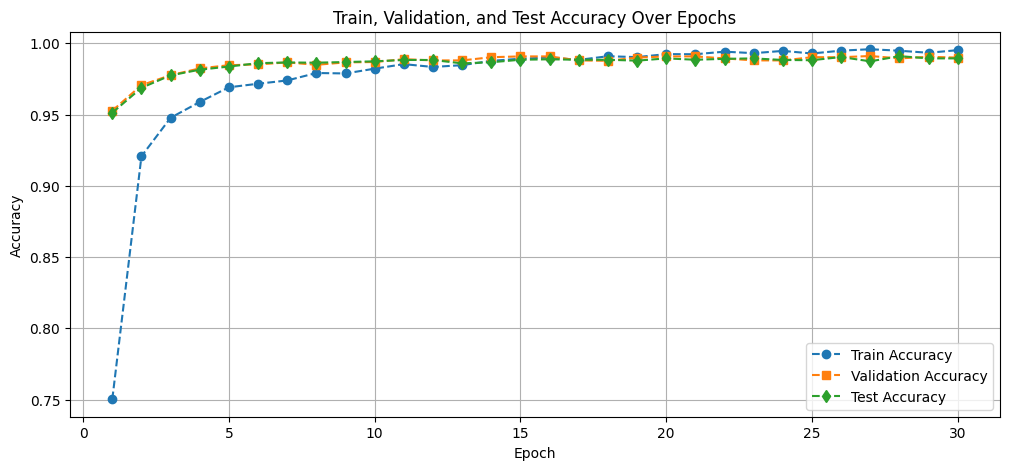

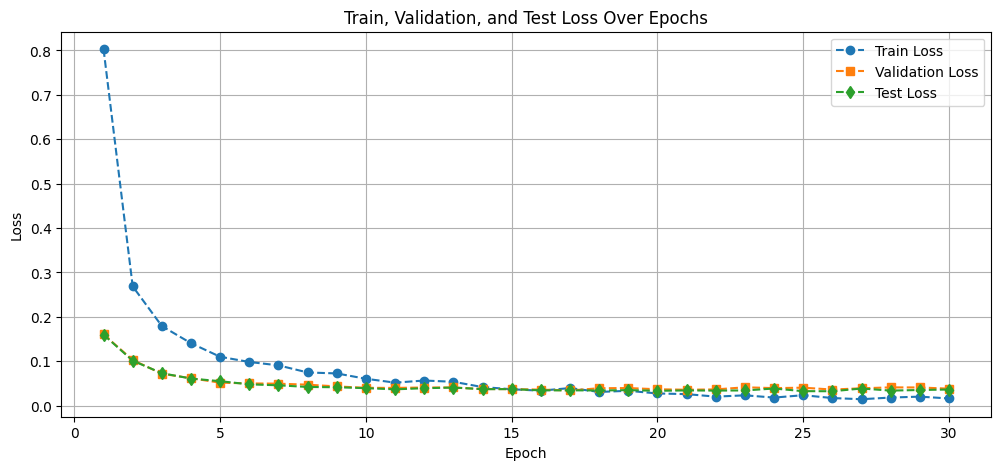

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(epoch_results_df["epoch"], epoch_results_df["train_accuracy"], label="Train Accuracy", linestyle="dashed", marker="o")
plt.plot(epoch_results_df["epoch"], epoch_results_df["val_accuracy"], label="Validation Accuracy", linestyle="dashed", marker="s")
plt.plot(epoch_results_df["epoch"], epoch_results_df["test_accuracy"], label="Test Accuracy", linestyle="dashed", marker="d")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epoch_results_df["epoch"], epoch_results_df["train_loss"], label="Train Loss", linestyle="dashed", marker="o")
plt.plot(epoch_results_df["epoch"], epoch_results_df["val_loss"], label="Validation Loss", linestyle="dashed", marker="s")
plt.plot(epoch_results_df["epoch"], epoch_results_df["test_loss"], label="Test Loss", linestyle="dashed", marker="d")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train, Validation, and Test Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

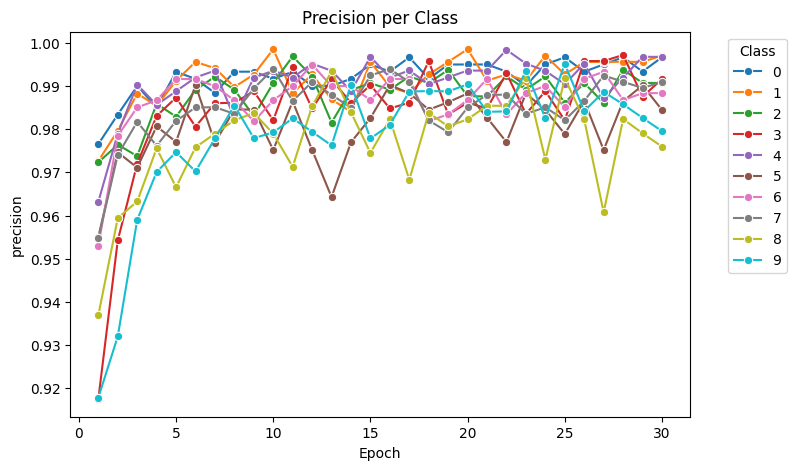

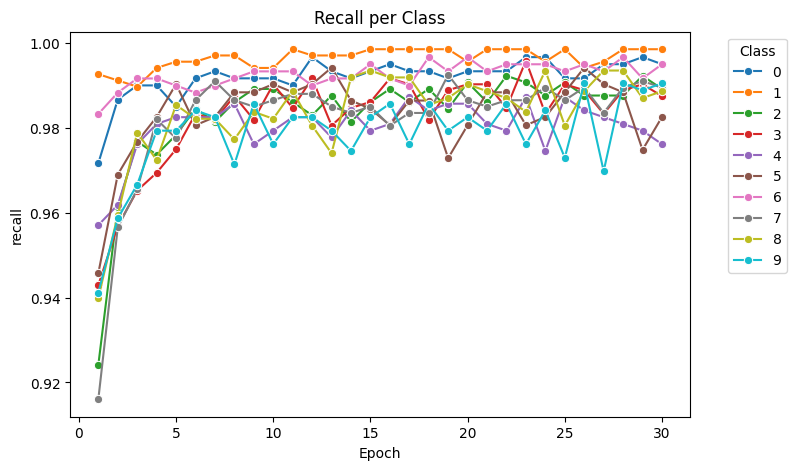

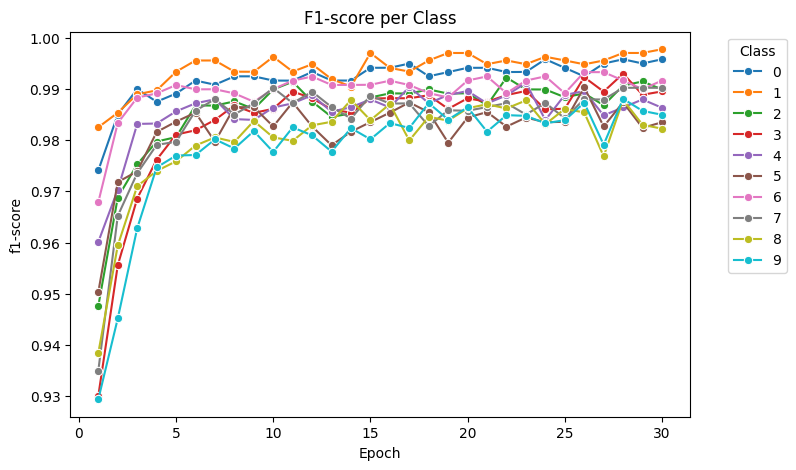

In [34]:
stats_list = []

for index, row in all_predictions_df.iterrows():
    epoch = row["epoch"]
    true_labels = np.array(row["true_labels"])
    predicted_labels = np.array(row["predicted_labels"])

    report = classification_report(true_labels, predicted_labels, output_dict=True)

    df_report = pd.DataFrame(report).transpose().reset_index()
    df_report["epoch"] = epoch

    stats_list.append(df_report)

stats_df = pd.concat(stats_list, ignore_index=True)

stats_df["index"] = stats_df["index"].astype(str)

filtered_df = stats_df[~stats_df["index"].isin(["accuracy", "macro avg", "weighted avg"])]

metrics = ["precision", "recall", "f1-score"]
titles = ["Precision per Class", "Recall per Class", "F1-score per Class"]

# Tworzymy osobne wykresy dla każdej metryki
for metric, title in zip(metrics, titles):
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=filtered_df,
        x="epoch",
        y=metric,
        hue="index",
        marker="o"
    )
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


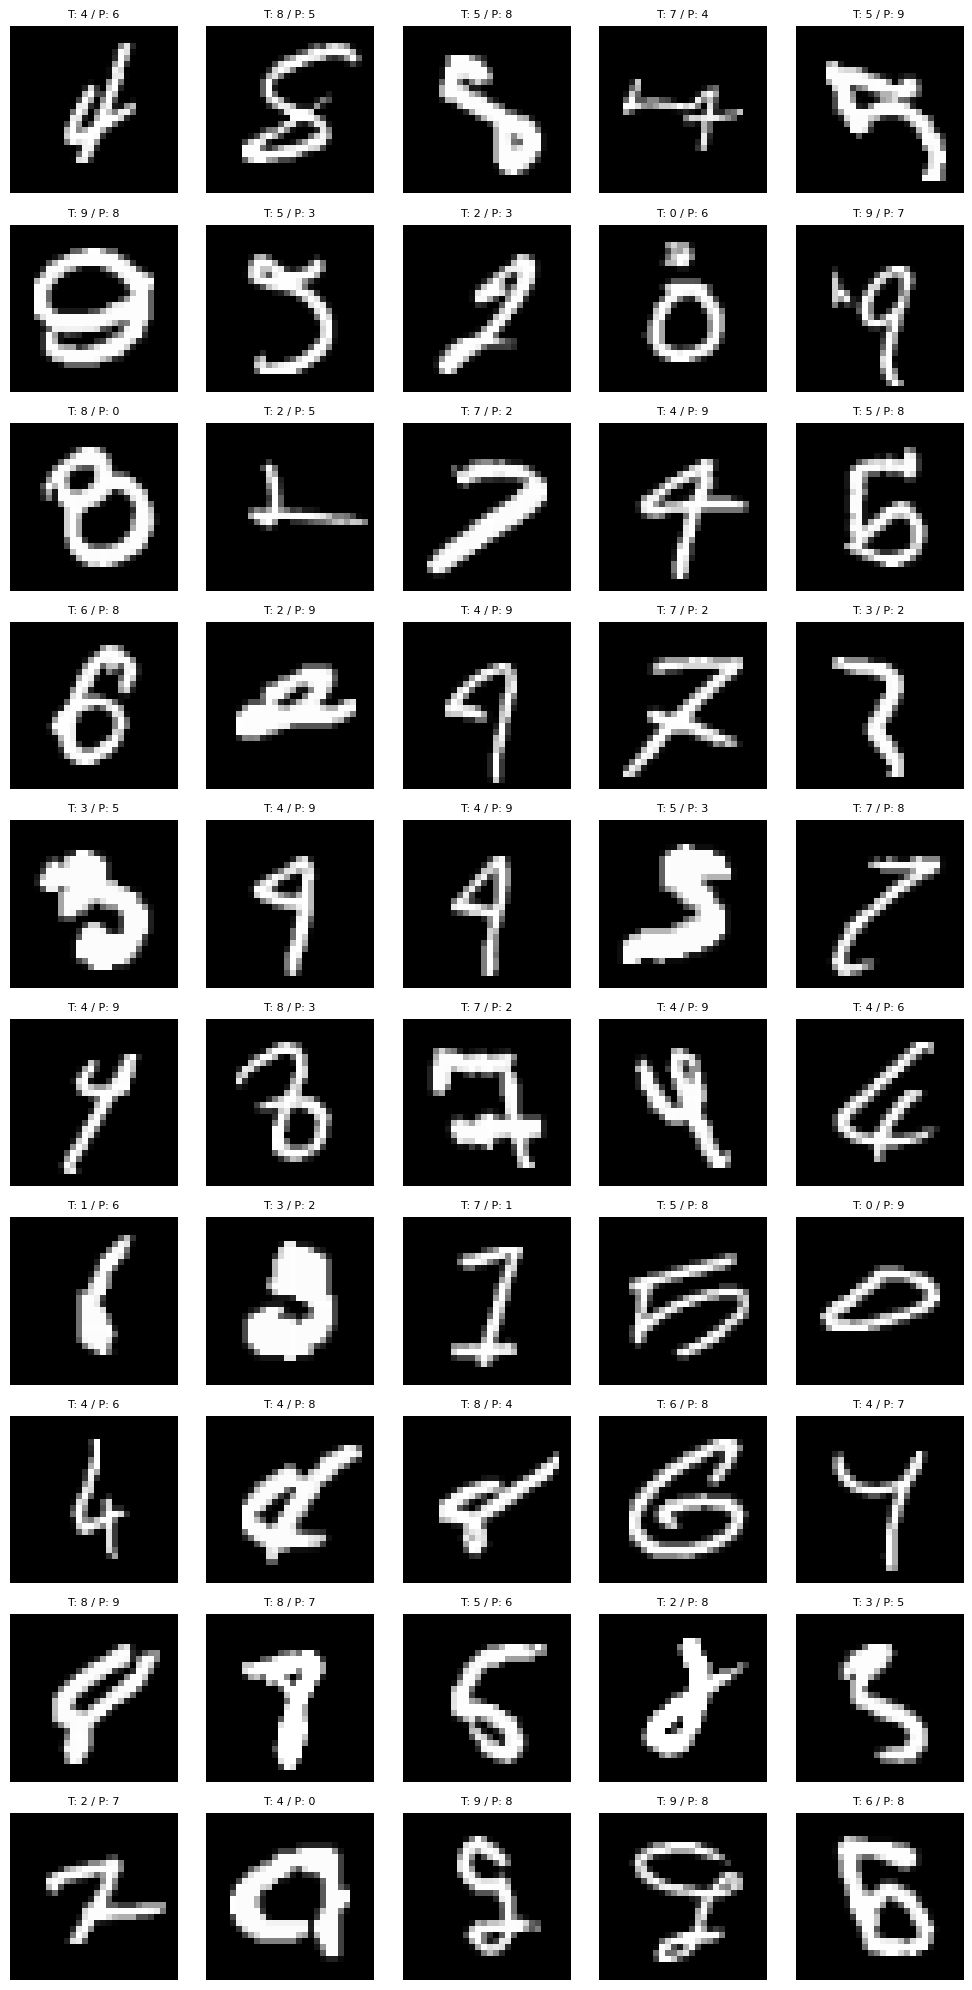

In [35]:
last_epoch = all_predictions_df["epoch"].max()
last_epoch_row = all_predictions_df[all_predictions_df["epoch"] == last_epoch].iloc[0]

true_labels = np.array(last_epoch_row["true_labels"])
predicted_labels = np.array(last_epoch_row["predicted_labels"])
data_samples = np.array(last_epoch_row["data"])

incorrect_indices = np.where(true_labels != predicted_labels)[0]


num_images = min(len(incorrect_indices), 50)
cols = 5
rows = (num_images // cols) + (num_images % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for i, idx in enumerate(incorrect_indices[:num_images]):
    ax = axes[i // cols, i % cols]
    ax.imshow(data_samples[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"T: {true_labels[idx]} / P: {predicted_labels[idx]}", fontsize=8)
    ax.axis("off")

for i in range(num_images, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [36]:
epoch_results_df["test_accuracy"]

0     0.951270
1     0.968730
2     0.977460
3     0.981429
4     0.983651
5     0.986032
6     0.986508
7     0.986349
8     0.986825
9     0.987302
10    0.988254
11    0.988254
12    0.985873
13    0.986667
14    0.988413
15    0.988730
16    0.988413
17    0.988413
18    0.987778
19    0.989365
20    0.988413
21    0.989048
22    0.989365
23    0.988254
24    0.988095
25    0.990317
26    0.987302
27    0.990952
28    0.989365
29    0.989365
Name: test_accuracy, dtype: float64